### Infosys 722 - Iteration 4 BDAS (Steps 1-8)
Submitted by: Sym Concepcion
UPI: scon497, studentID: 829972794

In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')

In [14]:
# import other packages
import seaborn as sns
import matplotlib.pyplot as plt

# For Data Manipulation
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType)

In [2]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('722Basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/10 09:18:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# Let's read in the data. There are 2 sources so we can integrate later. 
# Note that it's in the format of csv
df1 = spark.read.option("header", True).csv('dataset/data_ncr.csv')
df2 = spark.read.option("header", True).csv('dataset/data_therest.csv')

In [4]:
# df.show()
print("Files read into structure of",type(df1))
print("First dataset (NCR):", df1.count(), "x", len(df1.columns))
print("Second dataset (Rest of the regions):", df2.count(), "x", len(df2.columns))

Files read into structure of <class 'pyspark.sql.dataframe.DataFrame'>
First dataset (NCR): 4130 x 60
Second dataset (Rest of the regions): 37414 x 60


In [5]:
# integrate the 2 sources
# code adapted from https://www.geeksforgeeks.org/merge-two-dataframes-in-pyspark/
import functools 
def unionAll(dfs):
    return functools.reduce(lambda df1, df2: df1.union(df2.select(df1.columns)), dfs)

statsdata = unionAll([df1, df2])

In [6]:
print("Combined dataset:", statsdata.count(), "x", len(statsdata.columns))
statsdata.printSchema()

Combined dataset: 41544 x 60
root
 |-- Total Household Income: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Total Food Expenditure: string (nullable = true)
 |-- Main Source of Income: string (nullable = true)
 |-- Agricultural Household indicator: string (nullable = true)
 |-- Bread and Cereals Expenditure: string (nullable = true)
 |-- Total Rice Expenditure: string (nullable = true)
 |-- Meat Expenditure: string (nullable = true)
 |-- Total Fish and  marine products Expenditure: string (nullable = true)
 |-- Fruit Expenditure: string (nullable = true)
 |-- Vegetables Expenditure: string (nullable = true)
 |-- Restaurant and hotels Expenditure: string (nullable = true)
 |-- Alcoholic Beverages Expenditure: string (nullable = true)
 |-- Tobacco Expenditure: string (nullable = true)
 |-- Clothing, Footwear and Other Wear Expenditure: string (nullable = true)
 |-- Housing and water Expenditure: string (nullable = true)
 |-- Imputed House Rental Value: string (null

In [ ]:
statsdata.dtypes

In [7]:
statsdata.head()

22/10/10 09:19:25 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Row(Total Household Income='623738', Region='NCR', Total Food Expenditure='133762', Main Source of Income='Wage/Salaries', Agricultural Household indicator='0', Bread and Cereals Expenditure='21969', Total Rice Expenditure='13000', Meat Expenditure='15192', Total Fish and  marine products Expenditure='10438', Fruit Expenditure='3690', Vegetables Expenditure='5208', Restaurant and hotels Expenditure='52640', Alcoholic Beverages Expenditure='0', Tobacco Expenditure='0', Clothing, Footwear and Other Wear Expenditure='13548', Housing and water Expenditure='124170', Imputed House Rental Value='84000', Medical Care Expenditure='5784', Transportation Expenditure='19440', Communication Expenditure='19188', Education Expenditure='0', Miscellaneous Goods and Services Expenditure='41436', Special Occasions Expenditure='8200', Crop Farming and Gardening expenses='0', Total Income from Entrepreneurial Acitivites='0', Household Head Sex='Male', Household Head Age='62', Household Head Marital Status=

In [8]:
statsdata.show(1, vertical=True)

-RECORD 0-------------------------------------------------------------
 Total Household Income                        | 623738               
 Region                                        | NCR                  
 Total Food Expenditure                        | 133762               
 Main Source of Income                         | Wage/Salaries        
 Agricultural Household indicator              | 0                    
 Bread and Cereals Expenditure                 | 21969                
 Total Rice Expenditure                        | 13000                
 Meat Expenditure                              | 15192                
 Total Fish and  marine products Expenditure   | 10438                
 Fruit Expenditure                             | 3690                 
 Vegetables Expenditure                        | 5208                 
 Restaurant and hotels Expenditure             | 52640                
 Alcoholic Beverages Expenditure               | 0                    
 Tobac

In [13]:
statsdata.limit(5).toPandas()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,623738,NCR,133762,Wage/Salaries,0,21969,13000,15192,10438,3690,...,1,1,1,0,1,3,1,1,0,0
1,301900,NCR,109815,Wage/Salaries,0,22158,17550,14679,4260,3420,...,1,1,0,0,0,2,1,0,0,0
2,169200,NCR,47653,Other sources of Income,0,13260,8450,3370,1080,120,...,0,1,0,0,0,2,1,0,0,0
3,428200,NCR,179808,Wage/Salaries,0,20996,12350,24016,7920,3550,...,1,1,1,0,0,2,1,0,0,0
4,283100,NCR,123872,Other sources of Income,0,17060,13350,18478,13320,3830,...,1,1,0,0,0,2,1,0,0,0


In [16]:
# classify columns 
print("Columns can be classified into 3 types of information:")

def classifyDataColumns(statsdata):
    print("Information about Income")
    stringCol_income = "Income"
    cols_income = [col for col in statsdata.columns if stringCol_income.casefold() in col.casefold()]
    print(len(cols_income), cols_income)
    print()

    print("Information about Expenditure Details")
    stringCol_expense = "expen"
    cols_expense = [col for col in statsdata.columns if stringCol_expense.casefold() in col.casefold()]
    print(len(cols_expense), cols_expense)
    print()

    print("Information about Household Details")
    cols_HH = [col for col in statsdata.columns if ((stringCol_expense.casefold() not in col.casefold()) and (stringCol_income.casefold() not in col.casefold()))]
    print(len(cols_HH), cols_HH)
    print()

    data = [len(cols_income), len(cols_expense), len(cols_HH)]
    label = ['About Income', 'About Expenses', 'About Household Details']

    plt.pie(data, labels=label, autopct=lambda p: '{:.0f}'.format(p * sum(data) / 100), explode=[0,0,0], shadow=True, startangle=90)
    plt.title('Information Column Classification')
    plt.axis('equal')
    plt.show()
    #autopct='%1.1f%%'

Columns can be classified into 3 types of information:


Information about Income
3 ['Total Household Income', 'Main Source of Income', 'Total Income from Entrepreneurial Acitivites']

Information about Expenditure Details
19 ['Total Food Expenditure', 'Bread and Cereals Expenditure', 'Total Rice Expenditure', 'Meat Expenditure', 'Total Fish and  marine products Expenditure', 'Fruit Expenditure', 'Vegetables Expenditure', 'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Housing and water Expenditure', 'Medical Care Expenditure', 'Transportation Expenditure', 'Communication Expenditure', 'Education Expenditure', 'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure', 'Crop Farming and Gardening expenses']

Information about Household Details
38 ['Region', 'Agricultural Household indicator', 'Imputed House Rental Value', 'Household Head Sex', 'Household Head Age', 'Household Head Marital Status', 'Household Head Highest Grad

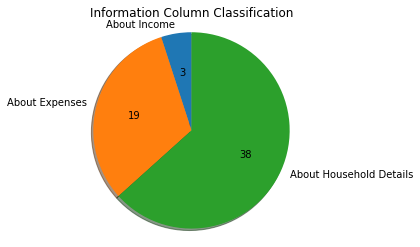

In [17]:
classifyDataColumns(statsdata)

### Data Description

In [9]:
statsdata.describe('Total Household Income').show()

+-------+----------------------+
|summary|Total Household Income|
+-------+----------------------+
|  count|                 41544|
|   mean|    247555.58480165608|
| stddev|     286880.5226527398|
|    min|                100000|
|    max|                 99997|
+-------+----------------------+



In [10]:
statsdata.describe('Medical Care Expenditure').show()

+-------+------------------------+
|summary|Medical Care Expenditure|
+-------+------------------------+
|  count|                   41544|
|   mean|       7160.230935875216|
| stddev|      26902.002274617334|
|    min|                       0|
|    max|                    9998|
+-------+------------------------+



In [11]:
statsdata.describe('Medical Care Expenditure', 'Total Household Income').show()

+-------+------------------------+----------------------+
|summary|Medical Care Expenditure|Total Household Income|
+-------+------------------------+----------------------+
|  count|                   41544|                 41544|
|   mean|       7160.230935875216|    247555.58480165608|
| stddev|      26902.002274617334|     286880.5226527398|
|    min|                       0|                100000|
|    max|                    9998|                 99997|
+-------+------------------------+----------------------+



### Data Manipulation

In [ ]:
# create a variable with the correct structure

data_schema = [StructField('Total Household Income',IntegerType(),True), StructField('Region',StringType(),True),
              StructField('Total Food Expenditure',IntegerType(),True), StructField('Main Source of Income',StringType(),True),
              StructField('Agricultural Household indicator',IntegerType(),True), StructField('Bread and Cereals Expenditure',IntegerType(),True),
              StructField('Total Rice Expenditure',IntegerType(),True), StructField('Meat Expenditure',IntegerType(),True),
              StructField('Total Fish and  marine products Expenditure',IntegerType(),True), StructField('Fruit Expenditure',IntegerType(),True),
              StructField('Vegetables Expenditure',IntegerType(),True), StructField('Restaurant and hotels Expenditure',IntegerType(),True),
              StructField('Alcoholic Beverages Expenditure',IntegerType(),True), StructField('Tobacco Expenditure',IntegerType(),True),
              StructField('Clothing, Footwear and Other Wear Expenditure',IntegerType(),True), StructField('Housing and water Expenditure',IntegerType(),True),
              StructField('Imputed House Rental Value',IntegerType(),True), StructField('Medical Care Expenditure',IntegerType(),True),
              StructField('Transportation Expenditure',IntegerType(),True), StructField('Communication Expenditure',IntegerType(),True),
              StructField('Education Expenditure',IntegerType(),True), StructField('Miscellaneous Goods and Services Expenditure',IntegerType(),True),
              StructField('Special Occasions Expenditure',IntegerType(),True), StructField('Crop Farming and Gardening expenses',IntegerType(),True),
              StructField('Total Income from Entrepreneurial Acitivites',IntegerType(),True), StructField('Household Head Sex',StringType(),True),
              StructField('Household Head Age',IntegerType(),True), StructField('Household Head Marital Status',StringType(),True),
              StructField('Household Head Highest Grade Completed',StringType(),True), StructField('Household Head Job or Business Indicator',StringType(),True),
              StructField('Household Head Occupation',StringType(),True), StructField('Household Head Class of Worker',StringType(),True),
              StructField('Type of Household',StringType(),True), StructField('Total Number of Family members',IntegerType(),True),
              StructField('Members with age less than 5 year old',IntegerType(),True), StructField('Members with age 5 - 17 years old',IntegerType(),True),
              StructField('Total number of family members employed',IntegerType(),True), StructField('Type of Building/House',StringType(),True),
              StructField('Type of Roof',StringType(),True), StructField('Type of Walls',StringType(),True),
              StructField('House Floor Area',IntegerType(),True), StructField('House Age',IntegerType(),True),
              StructField('Number of bedrooms',IntegerType(),True), StructField('Tenure Status',StringType(),True),
              StructField('Toilet Facilities',StringType(),True), StructField('Electricity',BooleanType(),True),
              StructField('Main Source of Water Supply',StringType(),True), StructField('Number of Television',IntegerType(),True),
              StructField('Number of CD/VCD/DVD',IntegerType(),True), StructField('Number of Component/Stereo set',IntegerType(),True),
              StructField('Number of Refrigerator/Freezer',IntegerType(),True), StructField('Number of Washing Machine',IntegerType(),True),
              StructField('Number of Airconditioner',IntegerType(),True), StructField('Number of Car, Jeep, Van',IntegerType(),True),
              StructField('Number of Landline/wireless telephones',IntegerType(),True), StructField('Number of Cellular phone',IntegerType(),True),
              StructField('Number of Personal Computer',IntegerType(),True), StructField('Number of Stove with Oven/Gas Range',IntegerType(),True),
              StructField('Number of Motorized Banca',IntegerType(),True), StructField('Number of Motorcycle/Tricycle',IntegerType(),True)
              ]

final_struct = StructType(fields=data_schema)

In [ ]:
# And now we can read in the data using that schema. If we print the schema, we can see that age is now an integer. 
df = spark.read.json('Datasets/people.json', schema=final_struct)

df.printSchema()

In [15]:
# Data Visualization

ax = sns.histplot (data=statsdata, x="Main Source of Income")
total = statsdata["Main Source of Income"].count()
for p in ax.patches:
    txt = str((p.get_height()/total*100).round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt)
    
plt.show()

ValueError: Cannot convert column into bool: please use '&' for 'and', '|' for 'or', '~' for 'not' when building DataFrame boolean expressions.

In [15]:
statsdata.describe('Medical Care Expenditure', 'Total Household Income').show().set_option('float_format', '{:,.2f}'.format)

+-------+------------------------+----------------------+
|summary|Medical Care Expenditure|Total Household Income|
+-------+------------------------+----------------------+
|  count|                   41544|                 41544|
|   mean|       7160.230935875216|    247555.58480165608|
| stddev|      26902.002274617334|     286880.5226527398|
|    min|                       0|                100000|
|    max|                    9998|                 99997|
+-------+------------------------+----------------------+



AttributeError: 'NoneType' object has no attribute 'set_option'

In [11]:
statsdata.dtypes

[('Total Household Income', 'string'),
 ('Region', 'string'),
 ('Total Food Expenditure', 'string'),
 ('Main Source of Income', 'string'),
 ('Agricultural Household indicator', 'string'),
 ('Bread and Cereals Expenditure', 'string'),
 ('Total Rice Expenditure', 'string'),
 ('Meat Expenditure', 'string'),
 ('Total Fish and  marine products Expenditure', 'string'),
 ('Fruit Expenditure', 'string'),
 ('Vegetables Expenditure', 'string'),
 ('Restaurant and hotels Expenditure', 'string'),
 ('Alcoholic Beverages Expenditure', 'string'),
 ('Tobacco Expenditure', 'string'),
 ('Clothing, Footwear and Other Wear Expenditure', 'string'),
 ('Housing and water Expenditure', 'string'),
 ('Imputed House Rental Value', 'string'),
 ('Medical Care Expenditure', 'string'),
 ('Transportation Expenditure', 'string'),
 ('Communication Expenditure', 'string'),
 ('Education Expenditure', 'string'),
 ('Miscellaneous Goods and Services Expenditure', 'string'),
 ('Special Occasions Expenditure', 'string'),
 ('Cr

In [12]:
#Filter rows that has numeric value on column
import org.apache.spark.sql.functions.{col}
statsdata.filter(col("alphanumeric").cast("int").isNotNull).show()

SyntaxError: invalid syntax (2936071580.py, line 2)

In [13]:
statsdata.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  object
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  object
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  object
 5   Bread and Cereals Expenditure                  41544 non-null  object
 6   Total Rice Expenditure                         41544 non-null  object
 7   Meat Expenditure                               41544 non-null  object
 8   Total Fish and  marine products Expenditure    41544 non-null  object
 9   Fruit Expenditure                              41544 non-null